Testing Playground

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pickle
import numpy as np
from matplotlib import pyplot as plt
from universal_portfolio import universal_portfolio
from ftl import ftl
from ftrl import ftrl

In [27]:
# intialization
dict = pickle.load(open('../data/stock_data.pickle', 'rb'))
stock_tickers = ['GOOGL', 'NKE', 'AAPL', 'C', 'GS', 'QCOM', 'FB', 'TSLA', 'DD', 'NFLX']
n = len(stock_tickers)
data = []
prev_price = [dict[i]['price'][0] for i in stock_tickers]
for j in range(len(dict['GOOGL']['price'])):
    curr_time_step = []
    for i in range(n):
        stock = stock_tickers[i]
        curr_time_step.append(dict[stock]['price'][j] / prev_price[i])
        prev_price[i] = dict[stock]['price'][j]
    data.append(curr_time_step)
data = np.array(data)
# data = np.array([[2,0.5],[0.5,2],[2,0.5],[0.5,2],[2,0.5],[0.5,2]])
up = universal_portfolio(n)
follow_leader = ftl(n)
follow_regularized = ftrl(n, 10)

(2,)
[[], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0069436870614752, 0.9816360600993171, 1.0095835806961242, 0.9848059454994227, 0.9975500204175778, 1.0206012513344516, 1.039948140345191, 1.0381642723025195, 1.0029980921254336, 1.0200656137941557], [0.9966664259754012, 1.0052910052914152, 1.0080645161322281, 0.9409693107491417, 0.950470732707593, 0.9401913875596754, 0.9898706560698146, 1.0293585699263934, 0.9922554347840018, 1.036649214659686], [1.0203581390294263, 0.9998120300757382, 1.0162499999993049, 1.0178221350920775, 1.0204565030113995, 0.8625954198485581, 1.0404596977329974, 1.033588035794549, 1.0639463234257438, 1.0277777777777777], [0.9705335905234134, 0.9843955630740073, 1.0584665846633143, 1.0142722383337224, 1.0168811985668178, 0.9767699115029215, 0.990921470721743, 0.9935955722474797, 0.983655083656454, 0.9845559845559846], [1.0179483740382622, 1.0737203972509923, 1.027957147927283, 0.9977493074795045, 1.0073459223915664, 1.0192525481317039, 1.0245075584058

In [20]:
up_performance = up.ingest(data)
ftl_performance = follow_leader.ingest(data)
ftrl_performance = follow_regularized.ingest(data)

257   10


AssertionError: 

In [9]:
print(str(up_performance) + '\n')
print(str(ftl_performance) + '\n')
print(str(ftrl_performance) + '\n')

wealth growth: [1, 1.25, 1.4335106968998153, 1.7933845718278898, 2.073890950875134, 2.5973643637251933, 3.03383081627732]
stock allocation: [[0.5, 0.5], [0.5, 0.5], [0.5687942949867641, 0.4312057050132351], [0.500695821201454, 0.4993041787985456], [0.5623921816310532, 0.4376078183689449], [0.5016075017924401, 0.49839249820755016], [0.5546386281293888, 0.44536137187060915]]

wealth growth: [1, 1.25, 0.6251512425210097, 0.7814541380784035, 0.6511921894648783, 0.8139860263886681, 0.8139750669809461]
stock allocation: [[0.5, 0.5], [0.5, 0.5], [0.9999193373221282, 8.066267787181624e-05], [0.5000160866961627, 0.4999839133038373], [0.7777944921449811, 0.2222055078550189], [0.49999568950355155, 0.5000043104964484], [0.6666756425846528, 0.33332435741534727]]

wealth growth: [1, 1.25, 1.5349769408172254, 1.9188520011859336, 2.3845388796238103, 2.9806824823073494, 3.7127069598791556]
stock allocation: [[0.5, 0.5], [0.5, 0.5], [0.5146789648974799, 0.4853210351025201], [0.5000568196003137, 0.499943

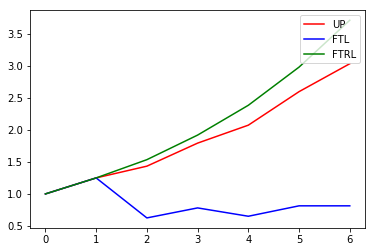

In [17]:
# graphing
x = [i for i in range(len(data) + 1)]

plt.plot(x, up_performance.wealth, 'r', label='UP')
plt.plot(x, ftl_performance.wealth, 'b', label='FTL')
plt.plot(x, ftrl_performance.wealth, 'g', label='FTRL')
plt.legend(loc='upper left')
plt.show()
